## Exploración de Datos (EDA - Análisis Exploratorio de Datos)

En esta fase crucial del proceso, llevaré a cabo un minucioso análisis de cada DataFrame asignado. El objetivo principal es obtener una comprensión profunda de los datos y derivar conclusiones fundamentadas que serán de gran utilidad en etapas posteriores.

Durante el EDA, se buscarán valores atípicos o inusuales que puedan influir en el análisis o en las decisiones posteriores. También se utilizarán herramientas de visualización para responder a preguntas que surjan durante el análisis. Esto implica la creación de gráficos informativos y el uso de técnicas estadísticas para explorar tendencias, patrones y relaciones en los datos.

El EDA es una parte esencial del proceso de análisis de datos, ya que proporciona una base sólida para la toma de decisiones informadas y la generación de información significativa a partir de los datos disponibles. Es un paso crucial que establece las bases para la fase posterior de modelado y predicción.

In [1]:
# Importando las librerias que usare en este proceso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Lectura del primer Dataframe que habla sobre la velocidad historica de internet media baja.**

In [2]:
# Leyendo el Dataframe
df1= pd.read_csv('.\datos_EDA\historico_veloci_internetmediabaja_EDA.csv')

In [3]:
df1.head(10) # Visualizó las 10 primeras filas

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
5,2022,4,Córdoba,10.877
6,2022,4,Corrientes,9.472
7,2022,4,Entre Ríos,8.747
8,2022,4,Formosa,7.203
9,2022,4,Jujuy,3.932


In [4]:
df1.info() # Echo un vistazo que clase o tipo de datos son las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [5]:
df1.describe() # Utilizó el metodo describe() para analizar su valor estadistico

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


## Análisis de Velocidad de Descarga de Internet en Provincias Argentinas

He realizado un análisis de la velocidad de descarga (Media de bajada) promedio de Internet en diversas provincias de Argentina a lo largo de los años y trimestres. Los datos recopilados abarcan un período desde 2014 hasta 2022 y proporcionan una visión detallada de la evolución de la velocidad de descarga en este país. <br>

Los datos revelan una velocidad de descarga promedio de aproximadamente 302.41 Megabits por segundo (Mbps) con una desviación estándar de 287.31 Mbps. Los valores oscilan desde un mínimo de 1 Mbps hasta un máximo de 988 Mbps. Es fundamental destacar que el valor mínimo de 1 Mbps podría requerir una revisión más detallada, ya que representa una velocidad de descarga extremadamente baja y posiblemente inconsistente con las normas típicas.<br>

El análisis de tendencias temporales revela que la velocidad de descarga ha experimentado fluctuaciones notables a lo largo de los años y trimestres. Este análisis se basa en la comparación de las mediciones en diferentes períodos y permite identificar patrones estacionales, picos de velocidad y cambios significativos en la conectividad a lo largo del tiempo.<br>

Uno de los hallazgos relevantes es la variación significativa en la velocidad de descarga entre las distintas provincias. Este análisis muestra que algunas provincias tienen un acceso a Internet más rápido en comparación con otras. Estas disparidades pueden deberse a una variedad de factores, como la infraestructura de red, la densidad de población y las inversiones en tecnología.

### ¿Cuál es la distribución de la velocidad media de bajada de Mbps en las provincias? <br>

Esta pregunta me surgio cuando hice la visualizacion estadistico con el metodo describe()

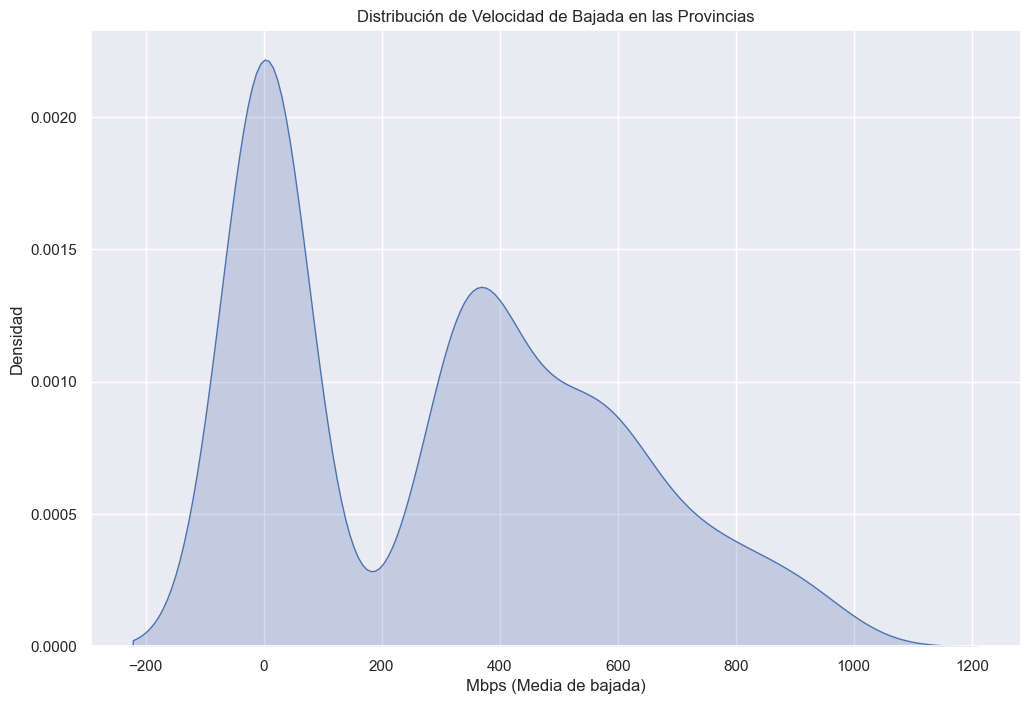

In [6]:
# Graficaré el dataframe
plt.figure(figsize=(12, 8))  # Ajustó el tamaño del gráfico.

# Utilizó seaborn para trazar un gráfico de densidad (Kernel Density Estimation)
sns.kdeplot(df1['Mbps (Media de bajada)'], fill=True)
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Densidad')
plt.title('Distribución de Velocidad de Bajada en las Provincias')
plt.grid(True)
plt.show()

Este gráfico de densidad presenta una representación visual de la distribución de la velocidad media de bajada en las provincias. La curva suave proporciona una visión clara de cómo se distribuyen los valores de velocidad en el conjunto de datos.

Observamos que la mayor densidad de velocidades se encuentra en torno a ciertos valores, lo que sugiere una concentración de provincias con velocidades de bajada específicas. La extensión y forma de la curva también indican la variabilidad en las velocidades entre las provincias.

------------------------------------------------------------------------------------------------------------------------------
En este otro gráfico represento la media de la velocidad de descarga en megabits por segundo (Mbps) para cada provincia.<br>

Cada barra muestra la velocidad media de descarga para una provincia en particular, las barras más altas indican las provincias con una velocidad de descarga más alta en promedio.

**Mi objetivo** es proporcionar una visión general de la velocidad media de descarga en cada provincia, lo que permite identificar las diferencias en la calidad del servicio de Internet entre las provincias.

**En conclusión sobre el siguiente gráfico,** las provincias con barras más altas representan aquellas con una mayor velocidad media de descarga en Mbps, mientras que las barras más bajas indican provincias con una velocidad media de descarga más lenta.

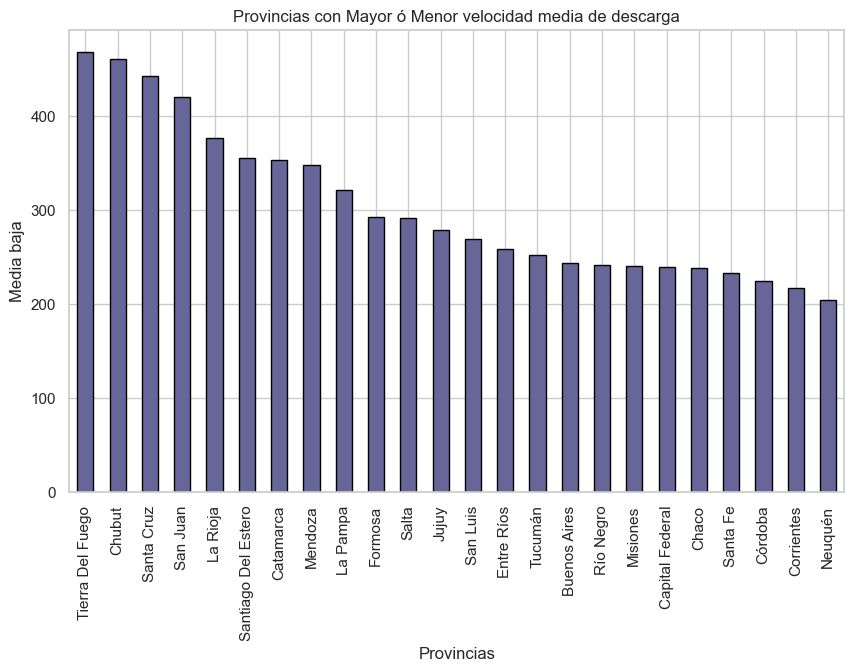

In [244]:
# Agrupó los datos por provincia y calculó la media de la velocidad de descarga en Mbps para cada provincia mediante
datos_agrupados = df1.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values(ascending=False) 

'''Ordenó las provincias de acuerdo 
    con su velocidad media de descarga en orden descendente'''
    
plt.figure(figsize=(10, 6))
datos_agrupados.plot(kind='bar', color='#666699', edgecolor='black')
plt.xlabel('Provincias') #Se añaden etiquetas a los ejes x e y
plt.ylabel('Media baja')
plt.title('Provincias con Mayor ó Menor velocidad media de descarga')
plt.show()

**Lectura de un segundo Dataframe sobre la velocidad de bajada en cada provincia.**

In [8]:
# Leyendo los datos
df2 = pd.read_csv('.\datos_EDA\internetfijo_velocidadbaja_provincia_EDA.csv')

In [9]:
df2.head() # Visualizo las primeras filas

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,4.0,Chaco,3.909,- 0,225,111,234.000,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,4.0,Chubut,20.026,8,- 0,- 0,69.000,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [10]:
df2.shape # Veo cuantas filas tiene el dataframe

(504, 97)

In [11]:
df2.describe() # Visualizo estadisticamente

,Año,Trimestre,"0,5 Mbps",3 Mbps,10 Mbps
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2019.857143,2.571429,135.160514,536.427409,1830.656857
std,1.522341,1.138019,1281.313402,3423.594162,13716.783075
min,2017.000000,1.000000,1.009000,1.029000,1.000000
25%,2019.000000,2.000000,19.000000,5.910000,7.161500
50%,2020.000000,3.000000,39.000000,9.833000,20.563500
75%,2021.000000,4.000000,69.000000,27.000000,92.386750
max,2022.000000,4.000000,28724.000000,53034.000000,204191.000000


El siguiente gráfico proporciona una visión de la velocidad baja de Internet de las provincias de Argentina.

- El gráfico permite comparar la calidad del acceso a Internet en diferentes provincias para las categorías seleccionadas. Cada provincia se representa con barras agrupadas para las velocidades de 0,5 Mbps, 3 Mbps y 10 Mbps.

- Las alturas de las barras indican la cantidad media para cada categoría. Las provincias con barras más altas tienen una mayor calidad de acceso a Internet en esa categoría en particular.

- La agrupación de las barras por provincia facilita la comparación de la distribución de la calidad del acceso a Internet en diferentes categorías y provincias.

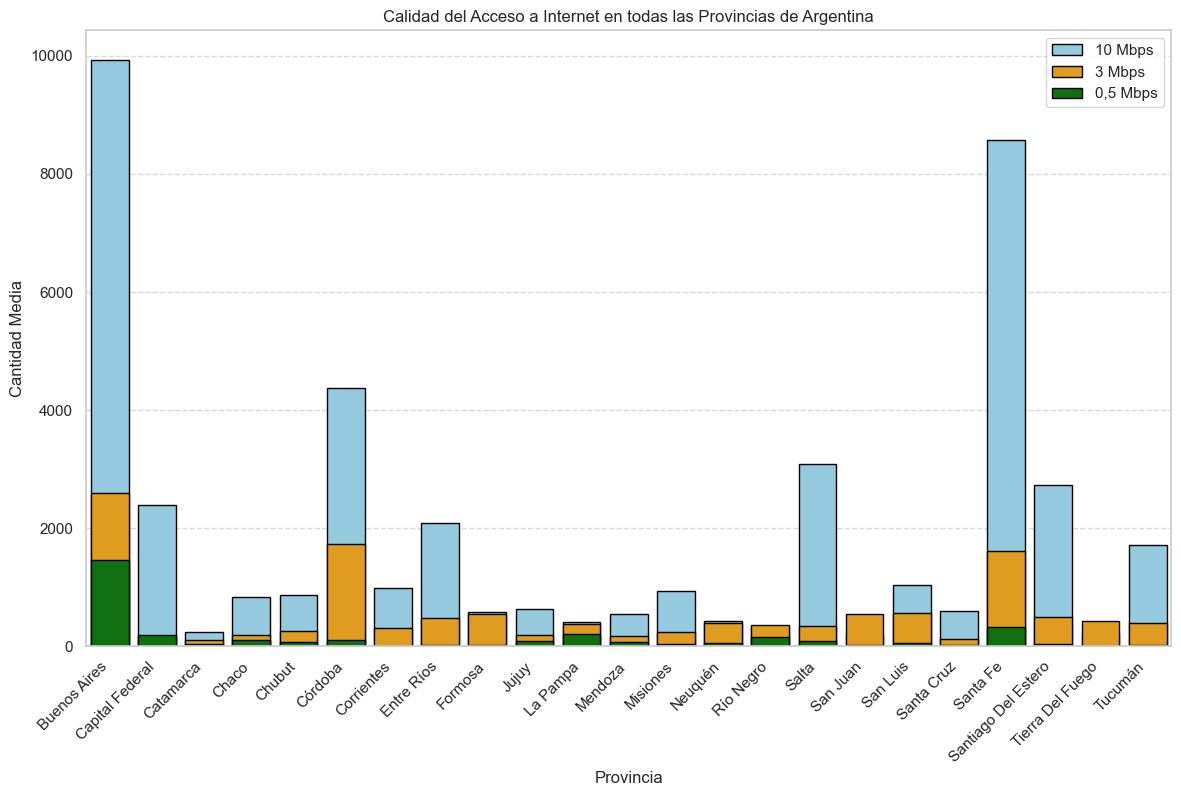

In [243]:
# Ordeno las provincias que quiero mostrar
provincias_ordenadas = df2.groupby('Provincia')['10 Mbps'].mean().sort_values(ascending=False).index[:23]

# Incluyo las provincias
df_top_provincias = df2[df2['Provincia'].isin(provincias_ordenadas)]

# Creo el gráfico
plt.figure(figsize=(14, 8))

# Utilizo Seaborn para crear el gráfico de barras
sns.barplot(data=df_top_provincias, x='Provincia', y='10 Mbps', color='skyblue', edgecolor='black', label='10 Mbps', errorbar=None)
sns.barplot(data=df_top_provincias, x='Provincia', y='3 Mbps', color='orange', edgecolor='black', label='3 Mbps', errorbar=None)
sns.barplot(data=df_top_provincias, x='Provincia', y='0,5 Mbps', color='green', edgecolor='black', label='0,5 Mbps', errorbar=None)

plt.xlabel('Provincia')
plt.ylabel('Cantidad Media')
plt.title('Calidad del Acceso a Internet en todas las Provincias de Argentina')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Sería interesante explorar la variación entre las provincias en términos de velocidad y si hay alguna provincia destacada.**
- El gráfico de barras proporciona una comparación clara y efectiva de las velocidades de conexión entre diferentes provincias en las categorías de 0,5 Mbps, 3 Mbps y 10 Mbps.

- La representación visual de las barras para cada provincia permite una comparación directa de las velocidades en diferentes categorías, lo que facilita la identificación de las diferencias entre las provincias.

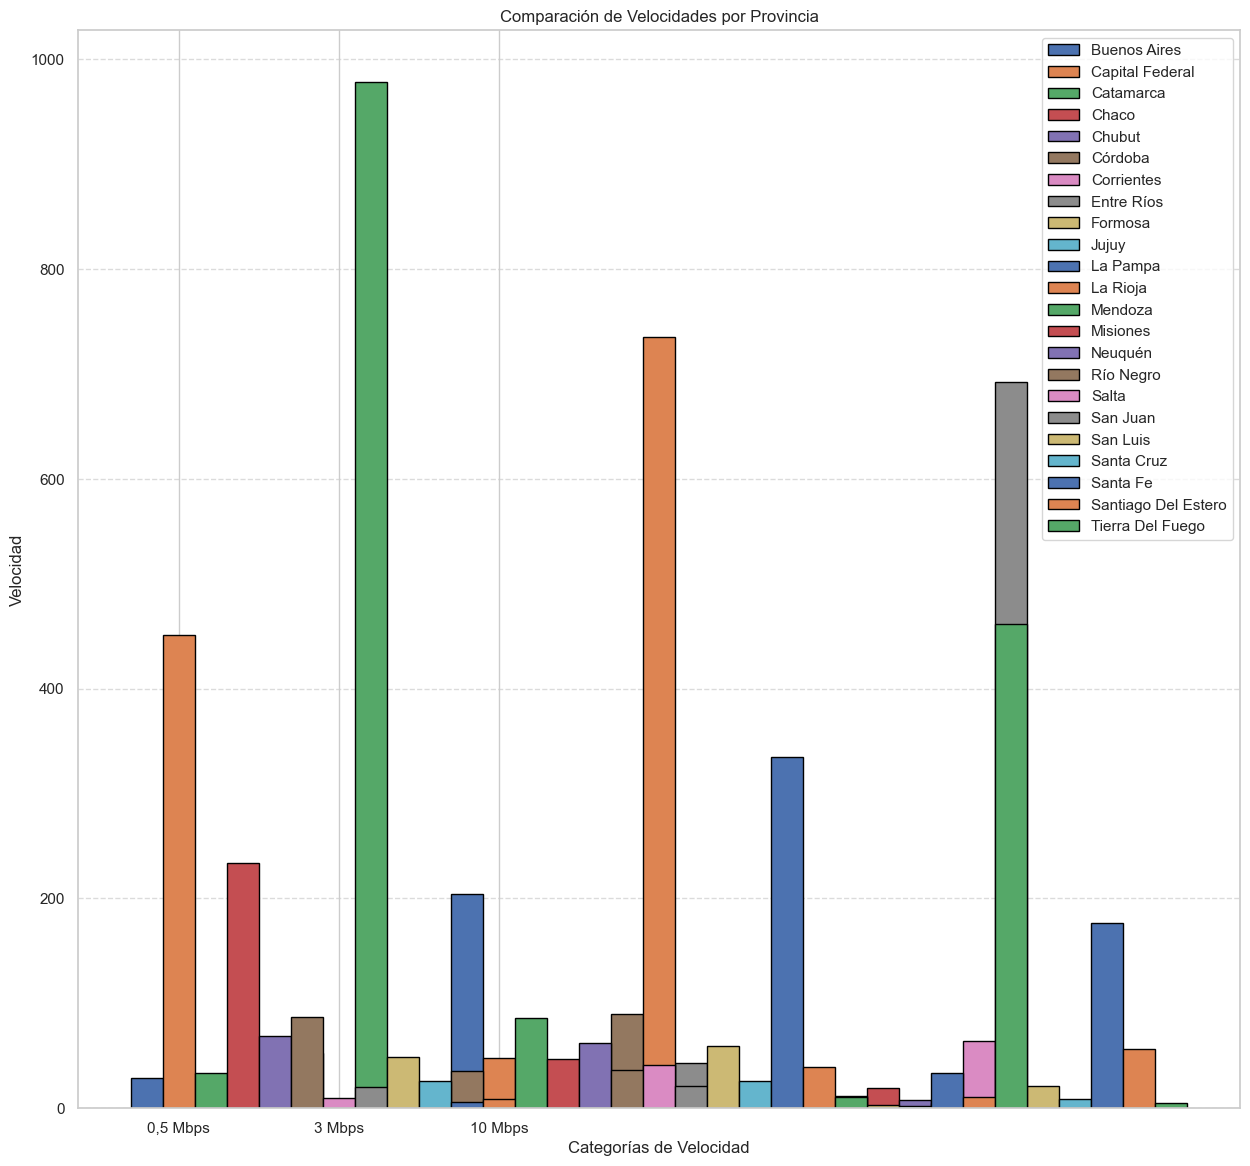

In [245]:
# extraigo y muestro las provincias únicas presentes en la columna.
provincias_muestra = df2['Provincia'].unique()[:23]

plt.figure(figsize=(15, 14))

for i, provincia in enumerate(provincias_muestra):
    datos_provincia = df2[df2['Provincia'] == provincia]
    velocidades = datos_provincia[['0,5 Mbps', '3 Mbps', '10 Mbps']].values[0]  # Obtengo los valores de velocidad para la provincia

    # Aqui se ajusta el ancho de las barras para mostrar las velocidades de manera diferenciada
    ancho_barra = 0.2
    desplazamiento = ancho_barra * i

    plt.bar(np.arange(len(velocidades)) + desplazamiento, velocidades, width=ancho_barra, label=provincia, edgecolor='black')

plt.xlabel('Categorías de Velocidad')
plt.ylabel('Velocidad')
plt.title('Comparación de Velocidades por Provincia')
plt.xticks(np.arange(len(velocidades)) + ancho_barra, ['0,5 Mbps', '3 Mbps', '10 Mbps'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Visión de la evolución de las velocidades de Internet en diferentes provincias a lo largo de los años.

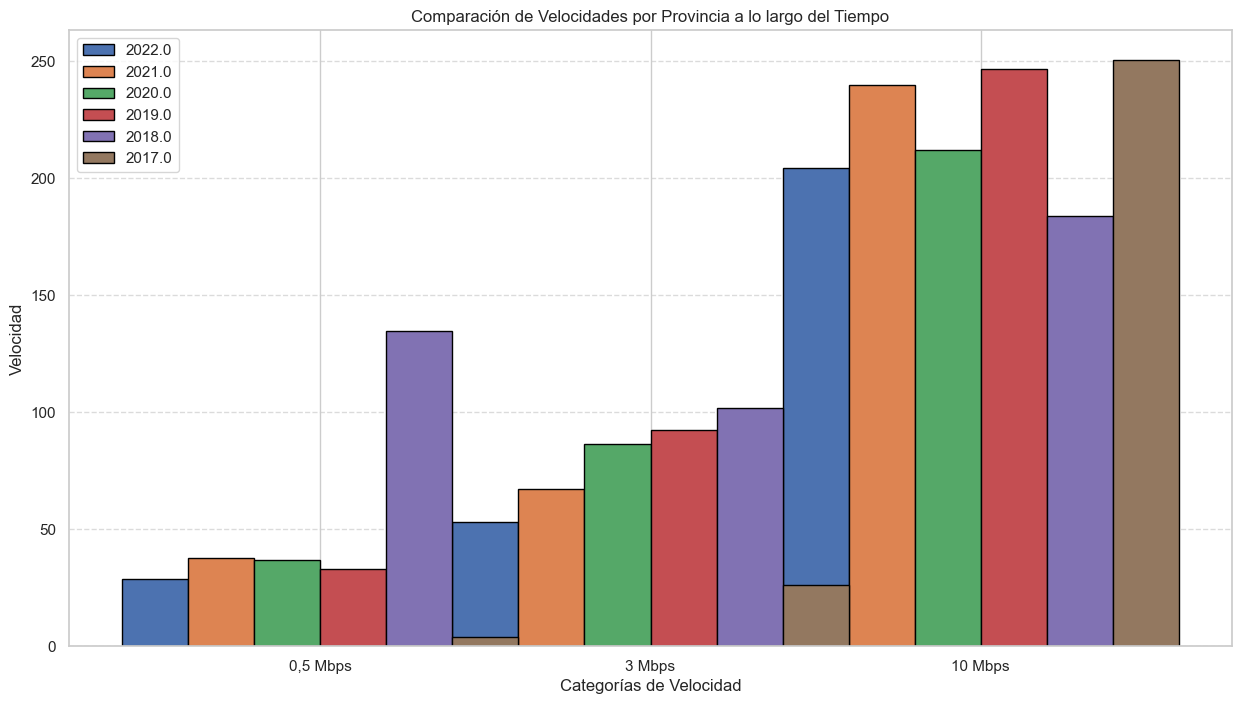

In [246]:
calidad_internet = df2['Año'].unique()[:23]

bar_width = 0.2
opacity = 0.7

plt.figure(figsize=(15, 8))

for i, provincia in enumerate(calidad_internet):
    datos_año = df2[df2['Año'] == provincia]
    velocidades = datos_año[['0,5 Mbps', '3 Mbps', '10 Mbps']].iloc[0]  # Obtengo los valores de velocidad para la provincia

    index = np.arange(len(velocidades)) + i * bar_width
    plt.bar(index, velocidades, bar_width, label=provincia, edgecolor='black')

plt.xlabel('Categorías de Velocidad')
plt.ylabel('Velocidad')
plt.title('Comparación de Velocidades por Provincia a lo largo del Tiempo')
plt.xticks(np.arange(len(velocidades)) + (len(calidad_internet) - 1) * bar_width / 2, ['0,5 Mbps', '3 Mbps', '10 Mbps'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


El gráfico proporciona una visión integral de la evolución de las velocidades de Internet en diferentes provincias a lo largo de un período de tiempo significativo. Cada barra representa la velocidad en categorías específicas (0,5 Mbps, 3 Mbps y 10 Mbps) para cada provincia en años distintos. Aquí se presentan algunos puntos clave derivados de la observación del gráfico:

**Disparidad entre Provincias:** Se observa una variabilidad considerable en las velocidades de Internet entre las provincias, lo que sugiere disparidades en la infraestructura y la disponibilidad de servicios en diferentes regiones.

**Tendencias Temporales:** Al examinar las barras para cada provincia a lo largo de los años, se pueden identificar tendencias temporales. Aumentos o disminuciones consistentes en las velocidades podrían indicar mejoras o limitaciones en la infraestructura de Internet a lo largo del tiempo.

**Dominancia de Ciertas Velocidades:** Se pueden identificar patrones de dominancia en ciertas categorías de velocidad. Por ejemplo, algunas provincias pueden tener una preferencia constante por velocidades más altas, como 10 Mbps, mientras que otras pueden mostrar una preferencia por velocidades más bajas.

- Conclusiones:<br>

La disparidad en las velocidades entre provincias sugiere la necesidad de políticas que promuevan la equidad en el acceso a servicios de Internet. Garantizar una distribución uniforme de velocidades puede contribuir al desarrollo equitativo en todas las regiones.<br>

La variación en las tendencias temporales resalta la importancia de realizar análisis más detallados para comprender las razones detrás de los cambios en las velocidades. Esto podría involucrar investigaciones sobre inversiones en infraestructura, cambios en la demanda de servicios, u otros factores relevantes como la inflación que se vive en el país.<br>

Las provincias pueden beneficiarse de la identificación de las categorías de velocidad más utilizadas. Este conocimiento puede dirigir esfuerzos para optimizar recursos y mejorar la infraestructura de Internet de acuerdo con las demandas específicas de cada región.

----------------------------------------------------------------------------------------------------------------------------

Conduciré un análisis centrado en las tecnologías más utilizadas, considerando su alcance entre los usuarios. Mi objetivo es plasmar a través de visualizaciones el impacto significativo que estas tecnologías tienen tanto a nivel individual como en el contexto provincial.<br>

Durante este análisis, buscaré identificar patrones y tendencias relacionadas con el uso de diferentes tecnologías. La visualización de datos permitirá una comprensión más profunda de cómo estas herramientas tecnológicas influyen en la experiencia del usuario y cómo su adopción varía entre las distintas provincias.<br>

Al explorar el panorama tecnológico, me enfocaré en destacar la relevancia de cada tecnología, evaluando su presencia en diferentes regiones y su impacto percibido. Este análisis también proporcionará perspectivas sobre las preferencias de los usuarios y posibles disparidades en la adopción de tecnologías en función de factores geográficos.<br>

A través de este proceso, mi objetivo es generar conclusiones informadas que puedan ser útiles para la toma de decisiones estratégicas, ya sea en el ámbito individual o a nivel gubernamental. La representación visual de estos datos contribuirá a una comprensión más clara y a la identificación de áreas de oportunidad para mejorar la accesibilidad y el impacto positivo de estas tecnologías en las diversas comunidades provinciales.


**Lectura de mi tercer Dataframe que habla sobre las tecnologias accesibles que existen.**

In [15]:
df3 = pd.read_csv('.\datos_EDA\internet_accestecnologia_EDA.csv') # Leyendo mi tercer Dataframe

In [16]:
df3.head(100) # visualizo las primeras filas

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
95,2022,1,Tucumán,93.0,62.0,86.0,4.0,487.0,246.0
96,2021,4,Buenos Aires,426.0,3.0,1.0,127.0,73.0,5.0
97,2021,4,Capital Federal,111.0,1.0,60.0,6.0,30.0,1.0
98,2021,4,Catamarca,16.0,14.0,25.0,2.0,2.0,59.0


In [17]:
df3.shape # Veo la estructura de los datos 

(864, 9)

In [18]:
df3.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


- Observare si los datos contienen algun tipo de dato Atipico.

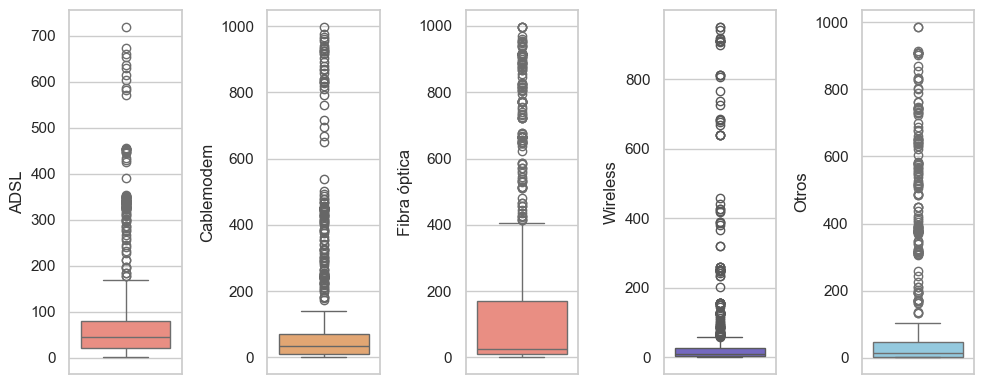

In [249]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df3, y='ADSL', color = "#FA8072")
plt.ylabel('ADSL')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df3, y='Cablemodem', color = "#F4A460")
plt.ylabel('Cablemodem')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df3, y='Fibra óptica', color = "#FA8072")
plt.ylabel('Fibra óptica')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df3, y='Wireless', color = "#6A5ACD")
plt.ylabel('Wireless')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df3, y='Otros', color = "#87CEEB")
plt.ylabel('Otros')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

**Conclusión sobre la Decisión de Mantener Outliers:**<br>

Tras la evaluación de los outliers presentes en las diferentes categorías de tecnología, he optado por mantenerlos en mi conjunto de datos. Esta decisión se fundamenta en las siguientes consideraciones:<br>

- Los valores atípicos identificados en las categorías de tecnología, como ADSL, Cablemodem, Fibra óptica, Wireless y Otros, representan datos legítimos y relevantes. Su presencia podría reflejar situaciones específicas que son de interés para el análisis.

- La información contenida en estos outliers contribuye a la integridad y riqueza de mi conjunto de datos. Eliminarlos podría resultar en la pérdida de detalles valiosos y en una representación menos precisa de la realidad.


-----------------------------------------------------------------------------------------------------------------------------

A continuación muestro en el siguiente gráfico la distribución y tendencias en la cantidad de conexiones.

* Grafico la Cantidad Media de Tipo de Conexiones.

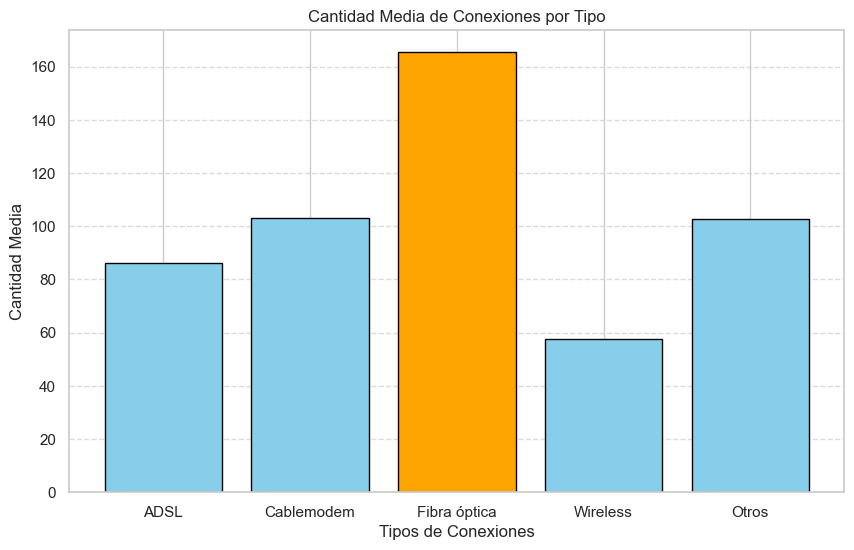

In [250]:
# Creo una lista que representan los tipos de conexiones de Internet y una lista de los valores medios.
tipos_conexiones = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
cantidad_media = [86.36, 103.29, 165.43, 57.78, 102.71]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Utilizamos un color distinto para resaltar el valor más alto
colors = ['skyblue' if valor != max(cantidad_media) else 'orange' for valor in cantidad_media]
plt.bar(tipos_conexiones, cantidad_media, color=colors, edgecolor='black')

plt.xlabel('Tipos de Conexiones')
plt.ylabel('Cantidad Media')
plt.title('Cantidad Media de Conexiones por Tipo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


Al examinar el gráfico presentado anteriormente, surge la siguiente interrogante: <br>

**¿Cuáles son algunas de las provincias que utilizan la tecnología de Fibra Óptica para la conexión a Internet?**

La visualización proporciona una perspectiva general de la distribución de la tecnología de Fibra Óptica. Para identificar específicamente las provincias que emplean esta tecnología, se puede realizar un análisis adicional centrado en aquellas regiones donde se observa un mayor predominio de la categoría de Fibra Óptica en el gráfico.

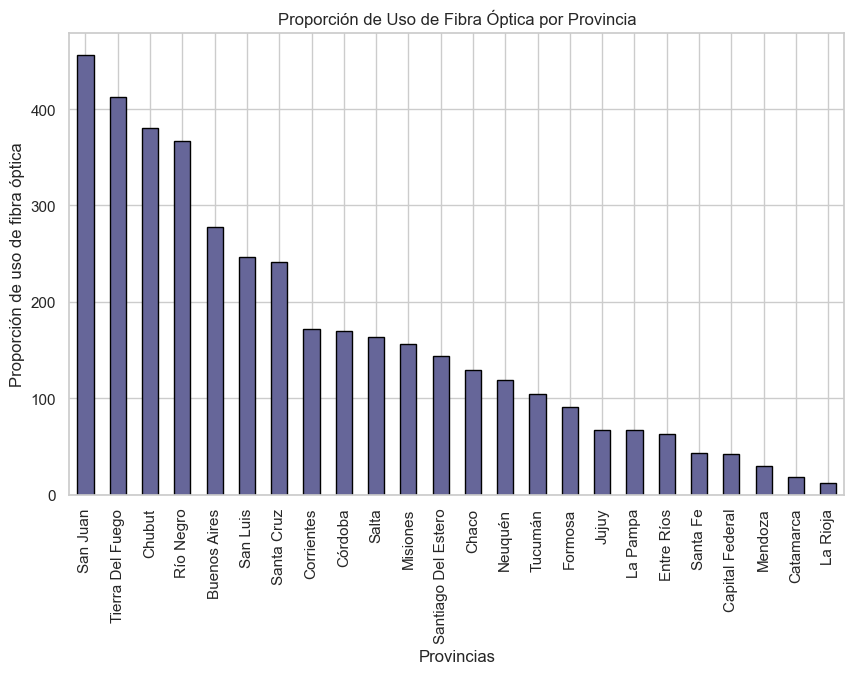

In [242]:
# Agrupó los datos por la columna 'Provincia', calculando el promedio de la columna 'Fibra óptica' para cada provincia.
datos_agrupados = df3.groupby('Provincia')['Fibra óptica'].mean().sort_values(ascending=False) # Ordeno los resultados de la media en orden descendente. 

# Creo el Grafico.
plt.figure(figsize=(10, 6))
datos_agrupados.plot(kind='bar', color='#666699', edgecolor='black') 
plt.xlabel('Provincias')
plt.ylabel('Proporción de uso de fibra óptica')
plt.title('Proporción de Uso de Fibra Óptica por Provincia')
plt.show()

El gráfico de barras presenta una visión concisa de la cantidad media de conexiones para diferentes tipos de conexión, reflejando la variabilidad en la demanda de servicios de Internet. A continuación, se destacan algunos puntos clave:

1. **Fibra Óptica lidera la demanda:** Se observa que el tipo de conexión "Fibra Óptica" domina en términos de cantidad media, superando a otros tipos. Esto sugiere una preferencia significativa por la alta velocidad y confiabilidad asociada con las conexiones de fibra óptica.

2. **Diversidad en Preferencias:** Los tipos de conexión como "Cablemodem" y las demás tecnologias también tienen una presencia notable, indicando una diversidad en las preferencias de los usuarios. La oferta de diferentes opciones puede estar alineada con las necesidades específicas de los usuarios.<br>

Con el propósito de obtener una comprensión más detallada, procederé a generar otro gráfico de barras que ilustre qué provincias utilizan las tecnologías de 'Cablemódem', 'ADSL', 'Wireless' y 'Otros'. Esta iniciativa busca disipar cualquier incertidumbre y enriquecer el análisis, permitiendo identificar claramente las provincias que emplean estas tecnologías específicas en el contexto de las conexiones a Internet.

<Figure size 1500x600 with 0 Axes>

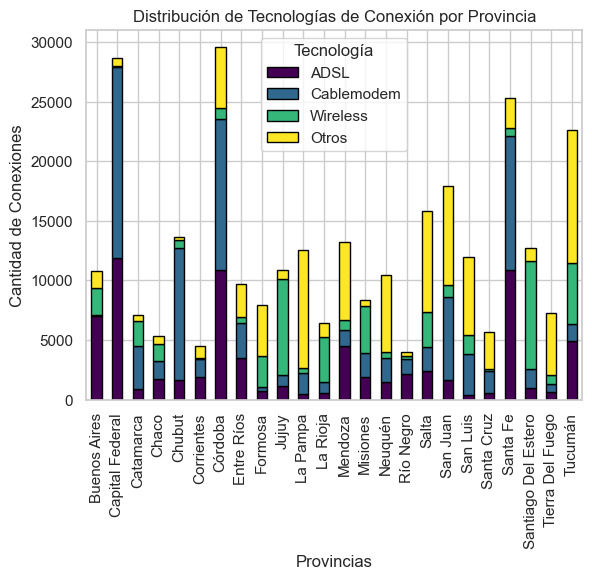

In [251]:
# Agrupo los datos por la columna 'Provincia' y sumo las frecuencias de las Tecnologias.
datos_agrupados = df3.groupby('Provincia')[['ADSL', 'Cablemodem', 'Wireless', 'Otros']].sum()

# Creo el gráfico de barras
plt.figure(figsize=(15, 6))
datos_agrupados.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

plt.xlabel('Provincias')
plt.ylabel('Cantidad de Conexiones')
plt.title('Distribución de Tecnologías de Conexión por Provincia')
plt.legend(title='Tecnología', loc='upper center')
plt.show()


**Conclusión:**

Al explorar el gráfico que destaca la distribución de tecnologías de conexión a Internet en distintas provincias, surge una reflexión fundamental sobre la inclusión digital y la equidad en el acceso a la conectividad. Este análisis no solo revela las preferencias tecnológicas, sino que también subraya la disparidad en el acceso a servicios de Internet, evidenciando aspectos humanitarios cruciales.<br>

La prominencia de la tecnología de Fibra Óptica, con su alta velocidad y confiabilidad, destaca la presencia de avances tecnológicos en algunas provincias. Sin embargo, este panorama también sugiere una posible brecha en el acceso tecnológico, ya que otras provincias podrían depender de tecnologías menos avanzadas.<br>

La diversidad en las preferencias tecnológicas, incluyendo opciones como "Cablemodem" y otras tecnologías, señala la adaptabilidad a diversas necesidades de los usuarios. Sin embargo, es crucial reconocer que algunas tecnologías más avanzadas podrían estar fuera del alcance de personas de bajos recursos, lo que subraya desafíos en la inclusión digital.<br>
Este análisis destaca la importancia de políticas inclusivas que aborden la brecha digital y promuevan la accesibilidad equitativa a servicios de Internet. El acceso a tecnologías más avanzadas, como la Fibra Óptica, no debería limitarse a ciertas regiones, sino extenderse de manera equitativa para impulsar un desarrollo más equilibrado.<br>

La iniciativa de generar un gráfico específico para tecnologías como 'Cablemódem', 'ADSL', 'Wireless' y 'Otros' demuestra un enfoque centrado en identificar las necesidades específicas de cada provincia. Este análisis detallado contribuye a entender mejor los desafíos y a diseñar estrategias que se adapten a la diversidad de preferencias y capacidades económicas de las comunidades.<br>

En conclusión, este análisis va más allá de las tendencias tecnológicas, enfocándose en las implicaciones humanitarias de la conectividad. Subraya la necesidad de abordar las disparidades en el acceso a Internet y promover políticas que garanticen que la revolución digital beneficie a todas las comunidades, independientemente de su ubicación geográfica o nivel socioeconómico.

------------------------------------------------------------------------------------------------------------------------------

**Lectura del Cuarto Dataframe que nos muestra los ingresos miles en pesos Argentinos.**

In [23]:
# Leyendo los datos
df4 = pd.read_csv('.\datos_EDA\internet_ingresos_EDA.csv')

In [24]:
df4.head(10) # Mostrando las primeras 10 filas.

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021
5,2021,3,43,Jul-Sept 2021
6,2021,2,38,Abr-Jun 2021
7,2021,1,37,Ene-Mar 2021
8,2020,4,34,Oct-Dic 2020
9,2020,3,32,Jul-Sept 2020


In [25]:
df4.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,21.888889
std,2.618615,1.133893,19.239510
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.750000,6.750000
50%,2018.000000,2.500000,14.500000
75%,2020.000000,3.250000,32.500000
max,2022.000000,4.000000,72.000000


**Analisis de la tabla estadistica de ingresos**<br>

- La media y los percentiles (25%, 50%, 75%) de los ingresos proporcionan una idea general de la tendencia temporal.<br> La media es de aproximadamente 21.89 miles de pesos, y los percentiles indican cómo se distribuyen los datos a lo largo del tiempo.<br>

- La desviación estándar (std) de 19.24 sugiere una variabilidad significativa en los ingresos trimestrales.<br>

- Los valores mínimo y máximo indican que los ingresos oscilaron entre 3 y 72 miles de pesos durante el período considerado.


**A continuación, mostraré un diagrama de cajas con el objetivo de detectar posibles valores atípicos en los datos de ingresos trimestrales. Esto permitirá identificar la dispersión y evaluar la presencia de outliers en la distribución de los ingresos durante los diferentes trimestres.**

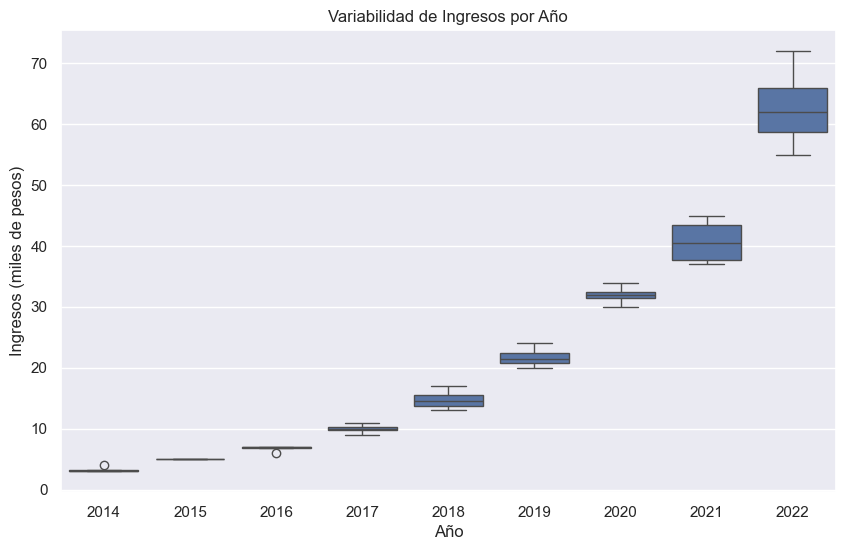

In [26]:
# Creo el diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Ingresos (miles de pesos)', data=df4)
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Variabilidad de Ingresos por Año')
plt.show()


In [255]:

# Calcular el rango intercuartílico (IQR)
Q1 = df4['Ingresos (miles de pesos)'].quantile(0.25)
Q3 = df4['Ingresos (miles de pesos)'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df4[(df4['Ingresos (miles de pesos)'] < lower_limit) | (df4['Ingresos (miles de pesos)'] > upper_limit)]

# Mostrar los resultados
print("Outliers:")
outliers.head()


Outliers:


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022


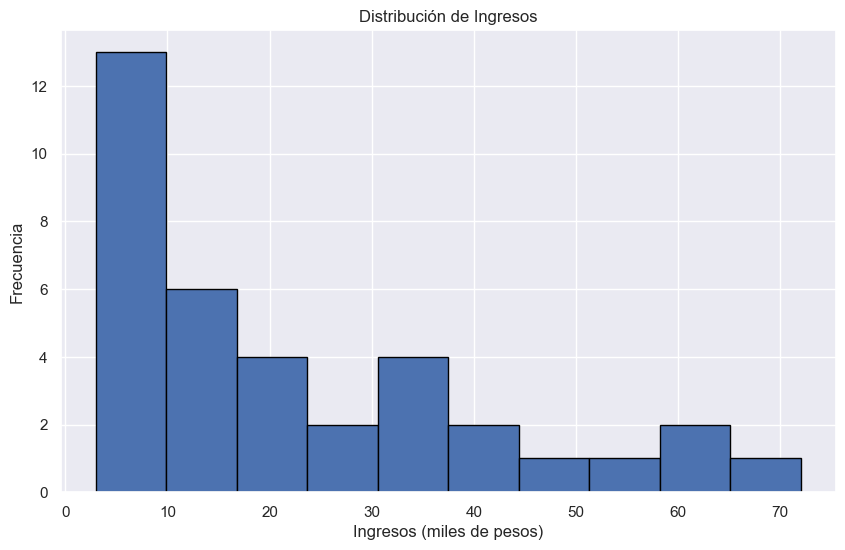

In [28]:
# Hago un histograma que representa la distribución de los ingresos trimestrales en miles de pesos.
plt.figure(figsize=(10, 6))
plt.hist(df4['Ingresos (miles de pesos)'], bins=10, edgecolor='black')

''' Especifico la columna de ingresos que se utilizará
        indico que el rango de valores se dividirá en 10 intervalos o barras en el eje x.'''
        
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.show()


**Optaré por conservar los outliers en mis datos, a pesar de que técnicamente se clasifican como tales, ya que no influyen de manera significativa en el logro de mis objetivos analíticos. Al ser datos válidos, estos outliers reflejan situaciones legítimas, por lo que la eliminación de los mismos podría no ser justificada.**

-----------------------------------------------------------------------------------------------------------------------------

* En el siguiente analsisis creare un gráfico de barras que representara los ingresos totales de cada año y está dividida por color para mostrar los ingresos por trimestre.

**Comparación de ingresos:** Permite comparar los ingresos entre años y trimestres de manera clara.<br>

**Tendencias estacionales:** La separación por trimestres ayuda a identificar posibles patrones estacionales o variaciones cíclicas en los ingresos.

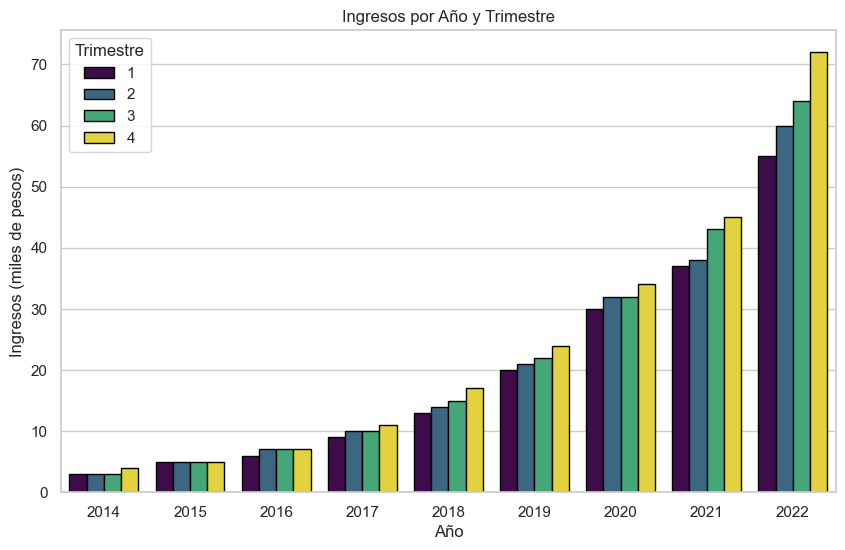

In [252]:
# Gráfico de barras por año trimestral.
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Ingresos (miles de pesos)', data=df4, hue='Trimestre', palette='viridis', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Ingresos por Año y Trimestre')
plt.show()


El gráfico de barras por año y trimestre proporciona una visión interesante de la variabilidad de los ingresos a lo largo del tiempo.<br> Al observar el patrón, parece haber un aumento notorio en los ingresos durante el cuarto trimestre de cada año, sugiriendo que podría haber una correlación con la temporada navideña, aunque en los años 2015 y 2016 se ve que se mantuvo casí igual.

El fenómeno de un aumento en los ingresos durante el cuarto trimestre podría deberse a varios factores, como la inflacíon que se vive en el país, las compras navideñas, promociones especiales, eventos comerciales o simplemente el patrón de gastos típico de esa época del año.

**Es apropiado presentar un gráfico de líneas para visualizar la evolución de los ingresos a lo largo de los años.**


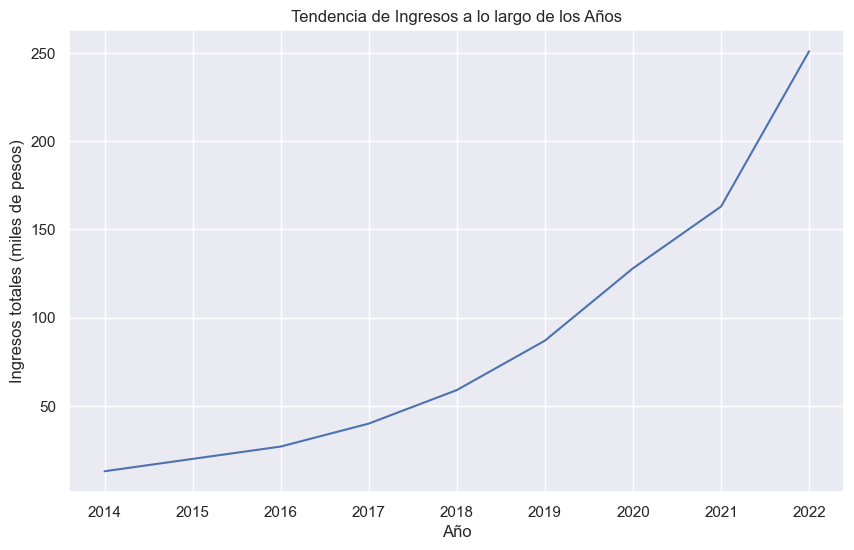

In [30]:
# Utilizo el gráfico de línea para mostrar la tendencia de los ingresos a lo largo de los años.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df4, estimator='sum', errorbar=None)
plt.xlabel('Año')
plt.ylabel('Ingresos totales (miles de pesos)')
plt.title('Tendencia de Ingresos a lo largo de los Años')
plt.show()


-----------------------------------------------------------------------------------------------------------------------------

**Hago lectura del quinto Dataframe que habla sobre el acceso de internet a los hogares.**

In [172]:
df5= pd.read_csv('.\datos_EDA\Internet_Penetracion_EDA.csv') # Leo el Dataframe

In [173]:
df5.head() # Visualizo las primeras filas

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


In [174]:
df5.shape# examino cuantas filas obtengo

(864, 7)

In [175]:
# borrare las columnas 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6'
# No me aportan nada de valor.
columnas_a_borrar = ['Unnamed: 4', 'Unnamed: 5','Unnamed: 6']

# Utilizo el método drop para eliminar las columnas
df5 = df5.drop(columnas_a_borrar, axis=1)

In [176]:
df5.info() # Hago una breve visualizacion para ver que tipo de datos tengo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


* He decidido eliminar las comas del Dataframe y transformarlo en formato numerico.

In [177]:
df5['Accesos por cada 100 hogares'] = df5['Accesos por cada 100 hogares'].str.replace(',', '') # Utilizo .replace() para reemplazar las comas por nada.

In [178]:
# Transformo la columna a numerico ya que antes estaba en tio object
df5['Accesos por cada 100 hogares'] = pd.to_numeric(df5['Accesos por cada 100 hogares'], errors='coerce')


In [179]:
print(df5['Accesos por cada 100 hogares']) # Imprimo para visualizarlo

0       7894
1      12273
2       6577
3       4362
4       8557
       ...  
859     2894
860     4785
861     1631
862     6397
863     3342
Name: Accesos por cada 100 hogares, Length: 864, dtype: int64


In [180]:
df5.describe() # Uso el metodo .describe() para ver las estadisticas.

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,4962.030093
std,2.583484,1.118682,2331.914988
min,2014.000000,1.000000,935.000000
25%,2016.000000,1.750000,3222.000000
50%,2018.000000,2.500000,4639.000000
75%,2020.000000,3.250000,6244.250000
max,2022.000000,4.000000,12406.000000


----------------------------------------------------------------------------------------------------------------------------

- Gráfico mis datos para visualizar el Acceso de Internet a travez de los Años.

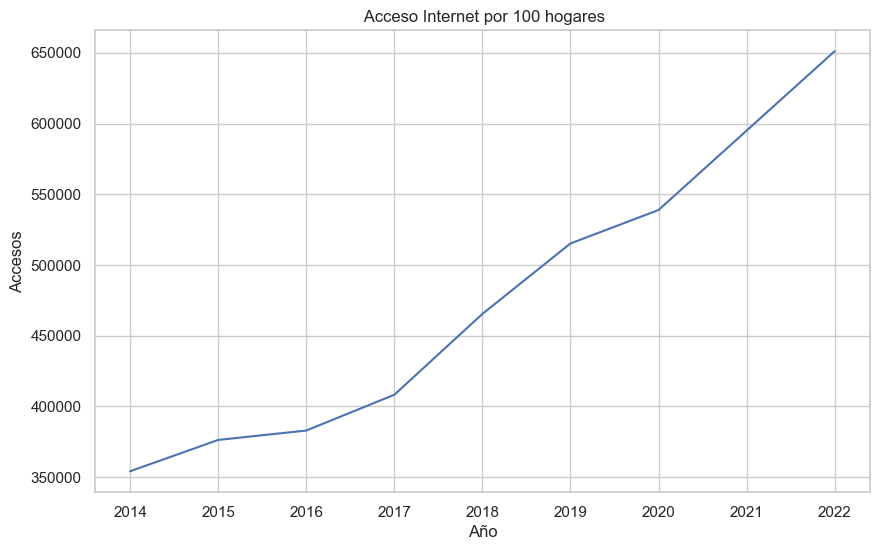

In [181]:
# Uso Seaborn para graficar.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df5, estimator='sum', errorbar=None) #  Las barras de error son útiles para indicar la incertidumbre o la variabilidad en los datos.
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title(' Acceso Internet por 100 hogares')
plt.show()


El análisis del gráfico revela una tendencia consistente de aumento en el acceso a Internet por cada 100 hogares a lo largo de los años.<br>

 La visualización permite una identificación clara de patrones ascendentes, indicando un progreso constante en la disponibilidad de servicios de Internet. Además, la capacidad para discernir variaciones significativas en diferentes años destaca la utilidad de este gráfico como una herramienta efectiva para comprender la evolución temporal del acceso a Internet en la población estudiada.<br>
 
  La consistencia en la tendencia ascendente sugiere un crecimiento sostenido en la conectividad, ofreciendo valiosa información para la toma de decisiones y la planificación estratégica en el ámbito de las infraestructuras digitales.

---------------------------------------------------------------------------------------------------------------------------------

En esta fase del proyecto, procederemos a la creación de un Indicador Clave de Rendimiento (KPI) con el objetivo de incrementar en un 2% el acceso al servicio de Internet para el próximo trimestre, considerando una proporción de cada 100 hogares, segmentado por provincia.<br>

**Definiciones clave:**

**"Nuevo acceso"** hace referencia al número proyectado de hogares con acceso a Internet al término del próximo trimestre.<br>

**"Acceso actual"** se refiere a la cantidad actual de hogares con acceso a Internet durante el trimestre en curso.

In [182]:
# Creación deL KPI
df5['KPI'] = ((df5['Accesos por cada 100 hogares'] - df5['Trimestre']) / df5['Trimestre']) * 100

df5.head(100) # Visualizo las 100 filas


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,KPI
0,2022,4,Buenos Aires,7894,197250.0
1,2022,4,Capital Federal,12273,306725.0
2,2022,4,Catamarca,6577,164325.0
3,2022,4,Chaco,4362,108950.0
4,2022,4,Chubut,8557,213825.0
...,...,...,...,...,...
95,2022,1,Tucumán,5739,573800.0
96,2021,4,Buenos Aires,7566,189050.0
97,2021,4,Capital Federal,11127,278075.0
98,2021,4,Catamarca,5525,138025.0


**Esta KPI representa el porcentaje de cambio en el acceso a Internet por cada 100 hogares para cada provincia durante diferentes trimestres.**<br>

- Las provincias de Buenos Aires y Capital Federal muestran los valores más altos en la KPI, indicando un aumento significativo en el acceso a Internet en comparación con los trimestres anteriores.<br>

- Aunque no alcanzan los niveles de Buenos Aires y Capital Federal, provincias como Tucumán y Catamarca también experimentan aumentos considerables en el acceso a Internet.<br>

 - Al observar el gráfico de líneas, se aprecia la variabilidad en el comportamiento de las provincias a lo largo del tiempo. Algunas provincias pueden mostrar tendencias ascendentes o descendentes, mientras que otras pueden mantenerse más estables.



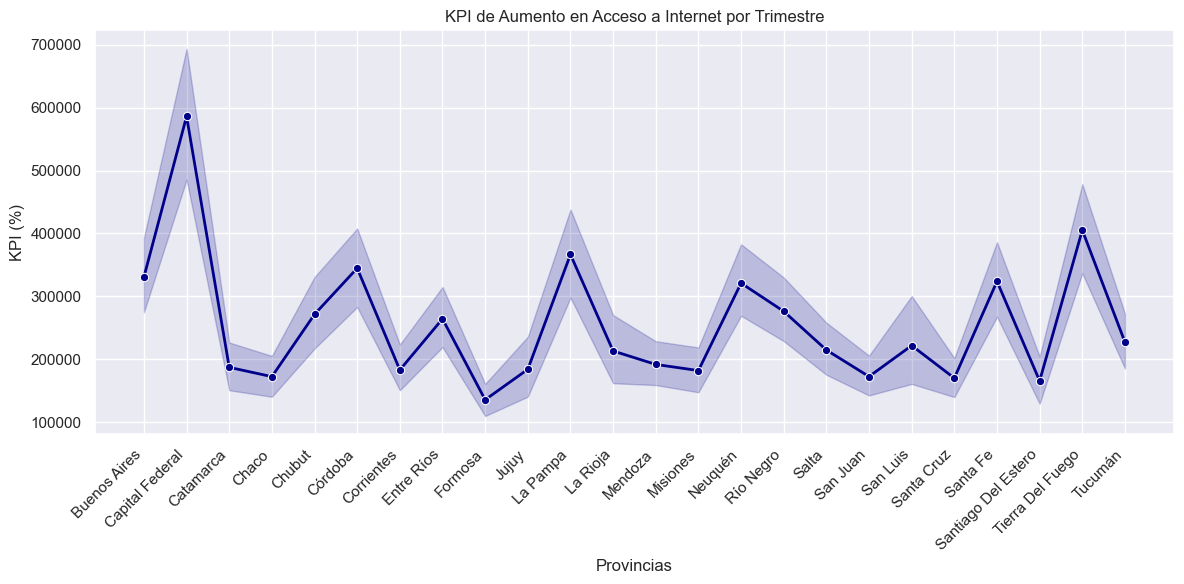

In [201]:
# Configuro el estilo de Seaborn
sns.set(style="darkgrid")

# Voy a gráficar el KPI por trimestre con un gráfico de líneas.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Provincia', y='KPI', data=df5, marker='o', color='darkblue', linewidth=2)
plt.xlabel('Provincias')
plt.ylabel('KPI (%)')
plt.title('KPI de Aumento en Acceso a Internet por Trimestre')
plt.xticks(rotation=45, ha='right')  # Roto las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajusto el diseño para evitar cortar las etiquetas
plt.show()

**El gráfico de barras ofrece una visión más clara y comprensible del análisis, permitiendo identificar patrones y variaciones en el KPI, y facilitando la interpretación de la relación potencial entre el acceso a Internet y las condiciones económicas de cada hogar.**

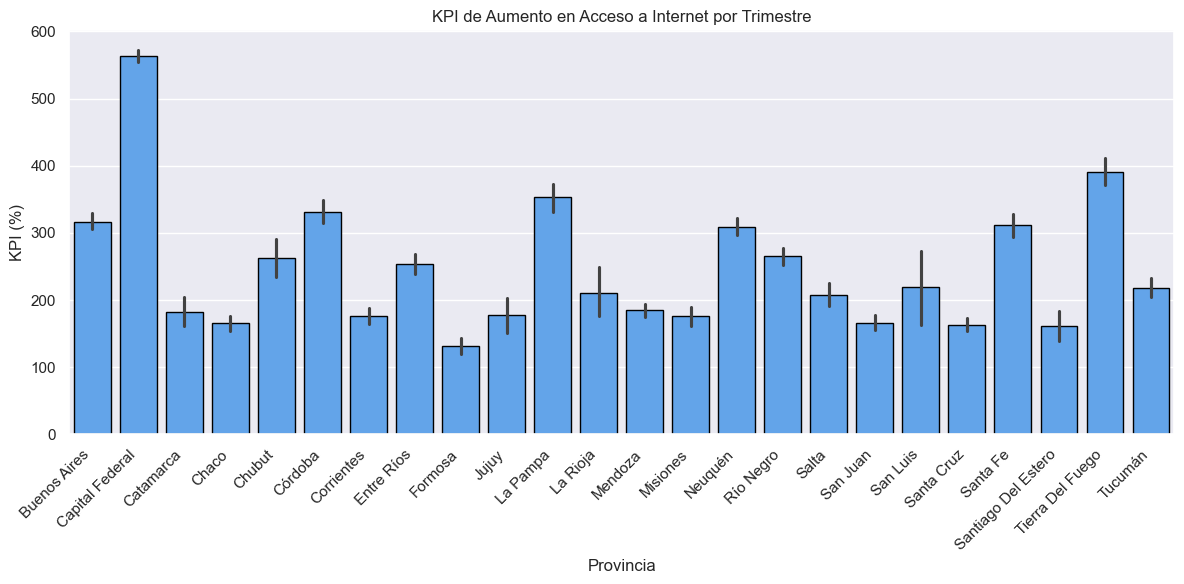

In [253]:
# Configuro el estilo
sns.set(style="darkgrid")

# Grafico el KPI por trimestre con un gráfico de barras.
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='KPI', data=df5, color='#4DA4FF', edgecolor='black')
plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.title('KPI de Aumento en Acceso a Internet por Trimestre')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()


-------------------------------------------------------------------------------------------------------------------------------

 El siguiente  KPI entre zonas de baja y alta conexión, calculado en un 167.23%, indica una notable disparidad en las velocidades de bajada promedio entre estas dos categorías. Este resultado se obtiene al comparar la diferencia entre las velocidades promedio de las zonas de alta y baja conexión, relativa a la velocidad promedio general. <br>

 **Conclusión:**

El alto valor del KPI sugiere una brecha significativa en la equidad de la conexión a Internet entre las zonas de baja y alta conexión. La velocidad de bajada en las zonas de alta conexión es sustancialmente mayor en comparación con las zonas de baja conexión. Esta disparidad puede indicar desafíos en la distribución equitativa de la infraestructura de Internet o la disponibilidad de servicios en diferentes áreas. Es fundamental abordar esta disparidad para garantizar un acceso justo y equitativo a la conectividad en todas las zonas. La visualización gráfica refuerza esta observación al mostrar una marcada diferencia en las barras que representan las velocidades de bajada promedio en ambas zonas.

In [230]:
# Calcula la velocidad de bajada promedio
velocidad_promedio = df1['Mbps (Media de bajada)'].mean()

# Aqui voy a identificar las zonas de baja y alta conexión
zonas_baja_conexion = df1[df1['Mbps (Media de bajada)'] < velocidad_promedio]
zonas_alta_conexion = df1[df1['Mbps (Media de bajada)'] >= velocidad_promedio]

# Voy a calcular el KPI de equidad entre zonas de baja y alta conexión
kpi_equidad = ((zonas_alta_conexion['Mbps (Media de bajada)'].mean() - zonas_baja_conexion['Mbps (Media de bajada)'].mean()) / velocidad_promedio) * 100

print(f"KPI de equidad entre zonas de baja y alta conexión: {kpi_equidad}%")


KPI de equidad entre zonas de baja y alta conexión: 167.22797502649485%


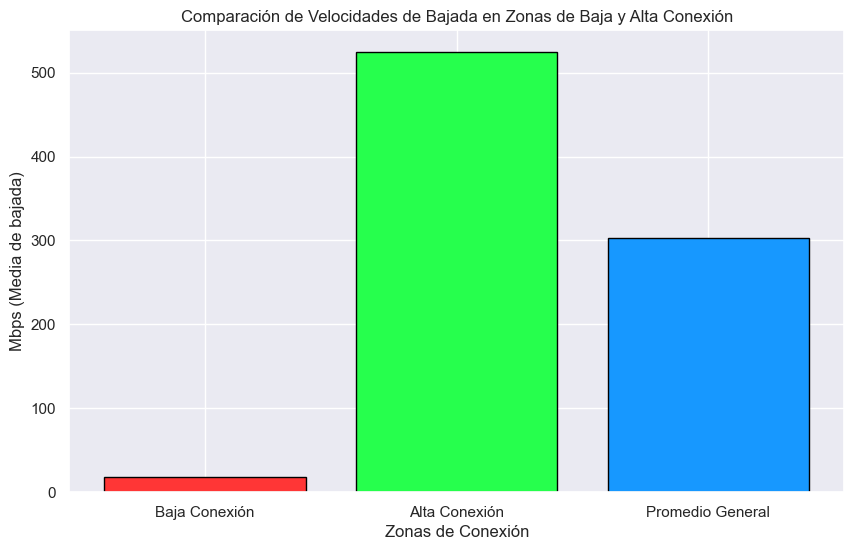

In [254]:
# Graficar la velocidad de bajada promedio en ambas zonas y la velocidad promedio general
plt.figure(figsize=(10, 6))
plt.bar(['Baja Conexión', 'Alta Conexión', 'Promedio General'], [zonas_baja_conexion['Mbps (Media de bajada)'].mean(), zonas_alta_conexion['Mbps (Media de bajada)'].mean(), velocidad_promedio], color=['#FF3636', '#26FF4D', '#1798FF'], edgecolor='black')
plt.xlabel('Zonas de Conexión')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Comparación de Velocidades de Bajada en Zonas de Baja y Alta Conexión')
plt.show()
